## AnimatedGraphs Usage Sample
[Package available on Pypi](https://pypi.org/project/AnimatedGraphs/)<br>
Author: Luis Gerardo Baeza<br>
Jul-2019

### 1. Instalation of the AnimatedGraphs package and additional tools

In [1]:
#!pip uninstall AnimatedGraphs -y
!pip --no-cache-dir install AnimatedGraphs==0.9.1 #Be sure this is the latest version

You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import AnimatedGraphs as ag
from AnimatedGraphs import AnimatedBar as agBar
from AnimatedGraphs import version as agVersion

from azureml import Workspace
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

In [3]:
#Check the version
import importlib
importlib.reload(ag)
from AnimatedGraphs import AnimatedBar as agBar
from AnimatedGraphs import version as agVersion
agVersion.getVersion()

'Version 0.9'

## 2. Sample graphic with first data set

### 2.1 Data acquisition

In [4]:
ws = Workspace()
AZURE_DS = ws.datasets['News_Final.csv']
NEWS_DATA_SET = AZURE_DS.to_dataframe()
NEWS_DATA_SET.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
0,99248.0,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,0.000000,-0.053300,-1,-1,-1
1,10423.0,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,0.208333,-0.156386,-1,-1,-1
2,18828.0,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28 00:00:00,-0.425210,0.139754,-1,-1,-1
3,27788.0,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01 00:06:00,0.000000,0.026064,-1,-1,-1
4,27789.0,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01 00:11:00,0.000000,0.141084,-1,-1,-1


### 2.2 Dataset preparation

The dataset must be in transactional style, includig exclusivey the data that needs to be plotted. In this case, we want to plot a graph to analyze the count of news that are posted into social media platforms from the different media sources like Forbes, CNN and so on. The graph will be filtered by the topic and it will iterate by the month of the year.<br>
Here is an example of the graph we will create: <br>
<img src="https://github.com/lgbaeza/py-animated-graph/raw/master/news_sample.gif" width="600">

In [5]:
#We extract the month and year from the publish date
NEWS_DATA_SET = NEWS_DATA_SET[["Source", "Topic", "PublishDate"]]
NEWS_DATA_SET["MTH"] = pd.DatetimeIndex(NEWS_DATA_SET["PublishDate"]).month
NEWS_DATA_SET["Year"] = pd.DatetimeIndex(NEWS_DATA_SET["PublishDate"]).year
NEWS_DATA_SET = NEWS_DATA_SET.drop(["PublishDate"], axis=1)

#We get the top 8 sources for 2015 and 2016
TopSources = NEWS_DATA_SET.groupby("Source").count().sort_values("Topic", ascending=False)[0:8].index.values
NEWS_DATA_SET = NEWS_DATA_SET.loc[( NEWS_DATA_SET["Source"].isin(TopSources) & NEWS_DATA_SET["Year"].isin([2015,2016]) )]

#We change the columns from numbers to name
NEWS_DATA_SET["Month"] = ""
NEWS_DATA_SET.loc[NEWS_DATA_SET['MTH'] == 1, ['Month']] = 'ENE'
NEWS_DATA_SET.loc[NEWS_DATA_SET['MTH'] == 2, ['Month']] = 'FEB'
NEWS_DATA_SET.loc[NEWS_DATA_SET['MTH'] == 3, ['Month']] = 'MAR'
NEWS_DATA_SET.loc[NEWS_DATA_SET['MTH'] == 4, ['Month']] = 'ABR'
NEWS_DATA_SET.loc[NEWS_DATA_SET['MTH'] == 5, ['Month']] = 'MAY'
NEWS_DATA_SET.loc[NEWS_DATA_SET['MTH'] == 6, ['Month']] = 'JUN'
NEWS_DATA_SET.loc[NEWS_DATA_SET['MTH'] == 7, ['Month']] = 'JUL'
NEWS_DATA_SET.loc[NEWS_DATA_SET['MTH'] == 8, ['Month']] = 'AGO'
NEWS_DATA_SET.loc[NEWS_DATA_SET['MTH'] == 9, ['Month']] = 'SEP'
NEWS_DATA_SET.loc[NEWS_DATA_SET['MTH'] == 10, ['Month']] = 'OCT'
NEWS_DATA_SET.loc[NEWS_DATA_SET['MTH'] == 11, ['Month']] = 'NOV'
NEWS_DATA_SET.loc[NEWS_DATA_SET['MTH'] == 12, ['Month']] = 'DIC'
NEWS_DATA_SET = NEWS_DATA_SET.drop(["MTH"], axis=1)
NEWS_DATA_SET = NEWS_DATA_SET.drop(["Year"], axis=1)
NEWS_DATA_SET.Month=pd.Categorical(NEWS_DATA_SET.Month,categories=['ENE', 'FEB', 'MAR', 'ABR', 'MAY', 'JUN', 
                                                       'JUL', 'AGO', 'SEP', 'OCT', 'NOV', 'DIC'])
NEWS_DATA_SET=NEWS_DATA_SET.sort_values('Month')

In [6]:
#We inspect the final dataset
print("Dataset length: {}".format(NEWS_DATA_SET["Source"].count()))
NEWS_DATA_SET.head()

Dataset length: 8526


,Source,Topic,Month
28051,ABC News,obama,ENE
26688,Bloomberg,economy,ENE
26702,Economic Times,economy,ENE
26709,Reuters,economy,ENE
26733,New York Times,obama,ENE


### 2.3 Graph creation

We are going to configure our bar

In [8]:
GRAPH_FILENAME = agBar.CreateGraphBar(
    DS=NEWS_DATA_SET,
    AGGREGATION_TYPE="COUNT", #Aggregation type
    AGGREGATION_ATTRIBUTE_NAME="", #Aggregation column, only required when COUNT AGGR
    BAR_ATTRIBUTE_NAME="Source", #Bar column
    LOOP_ATTRIBUTE_NAME="Month", #Iteration column
    SERIES_ATTRIBUTE_NAME="Topic", #Filter column
    GRAPH_TITLE="News posted on social media", #Title
    GRAPH_XLABEL="News Count", #X label
    GRAPH_YLABEL="Source", #y label
    IMAGE_SET_URL="https://drive.google.com/uc?export=download&id=1adnU9pwDewve1zClX8F_mvBO6AF_paRt", #URL to zip file containing an image for each value of the iteration column, in this case the month
    IMAGE_SET_EXT="png" )#extension of the images in the zip above
if (GRAPH_FILENAME != ""):
    print("Succeed. Animated grahBar available at {}" + GRAPH_FILENAME)
else:
    print("something went wrong")

Succeed. Animated grahBar available at {}/home/nbuser/library/animated-graph.gif


Showing the image

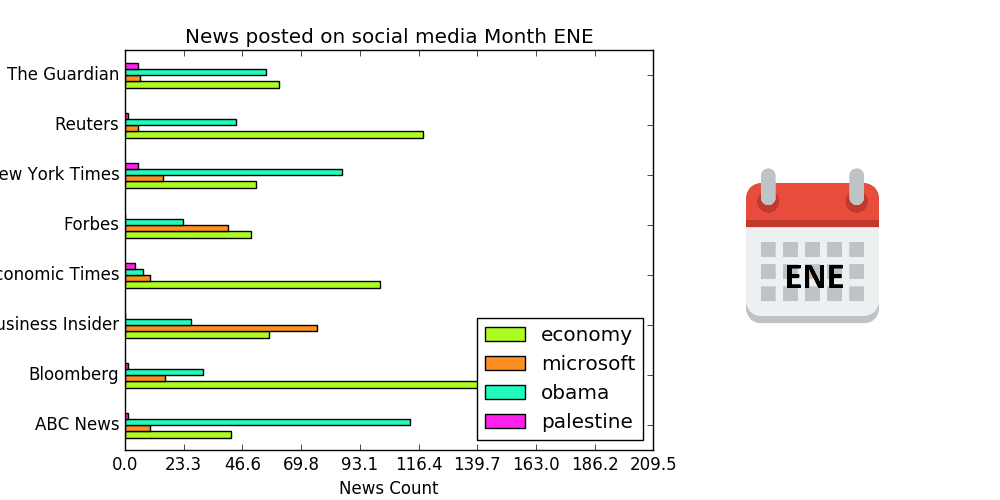

In [9]:
#Display 
%matplotlib inline
from IPython.display import Image
with open(GRAPH_FILENAME,'rb') as file:
    display(Image(file.read()), format='gif')

## 3. Another example data set using aggregation SUM

### 3.1 Data acquisition

In [10]:
ws = Workspace()
ds = ws.datasets['Bike Rental UCI dataset']
BIKE_DATA_SET = ds.to_dataframe()
BIKE_DATA_SET.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


### 3.2 Data prep
In this case, we want to show the usage of bike sharing service each month, iterating by hour, and filtering by the type of user: ocasional or registered.<br>
Here is an exampe:<br> 
<img src="https://github.com/lgbaeza/py-animated-graph/raw/master/bike_sample.gif" width="500">

In [11]:
BIKE_DATA_SET = BIKE_DATA_SET.loc[BIKE_DATA_SET.yr==1][['dteday', 'mnth','hr', 'casual', 'registered', 'yr']].copy()
BIKE_DATA_SET.loc[BIKE_DATA_SET['yr'] == 1, ['yr']] = 2012
BIKE_DATA_SET.loc[BIKE_DATA_SET['mnth'] == 1, ['mnth']] = 'ENE'
BIKE_DATA_SET.loc[BIKE_DATA_SET['mnth'] == 2, ['mnth']] = 'FEB'
BIKE_DATA_SET.loc[BIKE_DATA_SET['mnth'] == 3, ['mnth']] = 'MAR'
BIKE_DATA_SET.loc[BIKE_DATA_SET['mnth'] == 4, ['mnth']] = 'ABR'
BIKE_DATA_SET.loc[BIKE_DATA_SET['mnth'] == 5, ['mnth']] = 'MAY'
BIKE_DATA_SET.loc[BIKE_DATA_SET['mnth'] == 6, ['mnth']] = 'JUN'
BIKE_DATA_SET.loc[BIKE_DATA_SET['mnth'] == 7, ['mnth']] = 'JUL'
BIKE_DATA_SET.loc[BIKE_DATA_SET['mnth'] == 8, ['mnth']] = 'AGO'
BIKE_DATA_SET.loc[BIKE_DATA_SET['mnth'] == 9, ['mnth']] = 'SEP'
BIKE_DATA_SET.loc[BIKE_DATA_SET['mnth'] == 10, ['mnth']] = 'OCT'
BIKE_DATA_SET.loc[BIKE_DATA_SET['mnth'] == 11, ['mnth']] = 'NOV'
BIKE_DATA_SET.loc[BIKE_DATA_SET['mnth'] == 12, ['mnth']] = 'DIC'
BIKE_DATA_SET.rename(columns={'casual':'Casual', 'registered':'Registered'},inplace=True)

BIKE_DATA_SET = BIKE_DATA_SET.drop(["yr"], axis=1)

print("data set count: {}".format(BIKE_DATA_SET["mnth"].count()))
BIKE_DATA_SET.head()

data set count: 8734


,dteday,mnth,hr,Casual,Registered
8645,2012-01-01,ENE,0,5,43
8646,2012-01-01,ENE,1,15,78
8647,2012-01-01,ENE,2,16,59
8648,2012-01-01,ENE,3,11,41
8649,2012-01-01,ENE,4,0,8


In [12]:
BIKE_DATA_SET1 = BIKE_DATA_SET.copy()
BIKE_DATA_SET1["type"] = "Casual"
BIKE_DATA_SET1["count"] = BIKE_DATA_SET1["Casual"]
BIKE_DATA_SET1 = BIKE_DATA_SET1.drop(["Registered", "Casual"], axis=1)

BIKE_DATA_SET2 = BIKE_DATA_SET.copy()
BIKE_DATA_SET2["type"] = "Registered"
BIKE_DATA_SET2["count"] = BIKE_DATA_SET2["Registered"]
BIKE_DATA_SET2 = BIKE_DATA_SET2.drop(["Casual", "Registered"], axis=1)

BIKE_DATA_SET_VF = BIKE_DATA_SET1.append(BIKE_DATA_SET2)

print("data set count: {}".format(BIKE_DATA_SET_VF["mnth"].count()))
BIKE_DATA_SET_VF.head()

data set count: 17468


,dteday,mnth,hr,type,count
8645,2012-01-01,ENE,0,Casual,5
8646,2012-01-01,ENE,1,Casual,15
8647,2012-01-01,ENE,2,Casual,16
8648,2012-01-01,ENE,3,Casual,11
8649,2012-01-01,ENE,4,Casual,0


### 3.3 Graph creation

In [13]:
GRAPH_FILENAME = agBar.CreateGraphBar(
    DS=BIKE_DATA_SET_VF,
    AGGREGATION_TYPE="SUM", #Aggregation type
    AGGREGATION_ATTRIBUTE_NAME="count", #Aggregation column
    BAR_ATTRIBUTE_NAME="mnth", #Bar column
    LOOP_ATTRIBUTE_NAME="hr", #Iteration column
    SERIES_ATTRIBUTE_NAME="type", #Filter column
    GRAPH_TITLE="Capital Bike Sharing Users", #Title
    GRAPH_XLABEL="User Count", #X label
    GRAPH_YLABEL="Month", #y label
    IMAGE_SET_URL="https://drive.google.com/uc?export=download&id=1yrP3rPAlMy35G-CagHbGLiEDInF2azoB", #URL to zip file containing an image for each value of the iteration column, in this case the month
    IMAGE_SET_EXT="png", #extension of the images in the zip above
    SORT_BARS_LIST=['ENE', 'FEB', 'MAR', 'ABR', 'MAY', 'JUN', 'JUL', 'AGO', 'SEP', 'OCT', 'NOV', 'DIC'], #sort order, in case we wanted the sources to appear in any specific order
    GRAPH_FILENAME="animated-graph2.gif") #name of the output file
if (GRAPH_FILENAME != ""):
    print("Succeed. Animated grahBar available at {}" + GRAPH_FILENAME)
else:
    print("something went wrong")

Succeed. Animated grahBar available at {}/home/nbuser/library/animated-graph2.gif


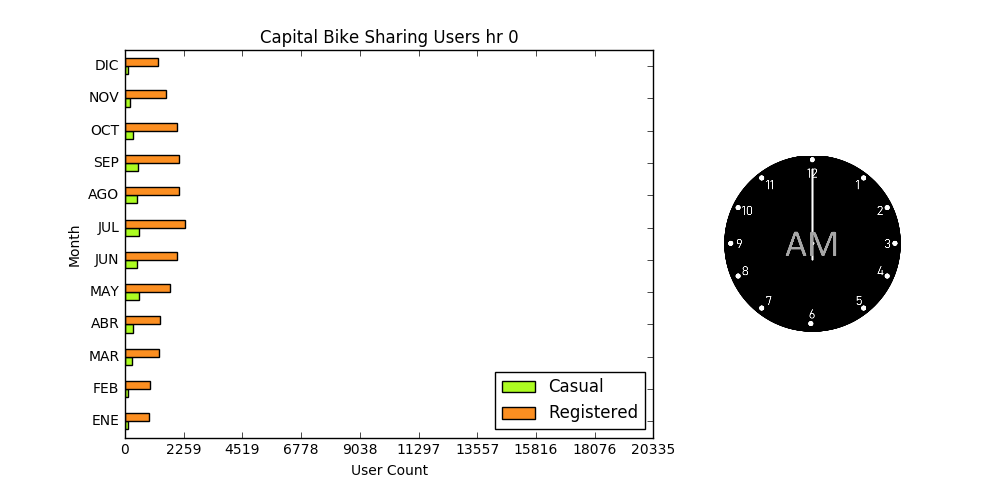

In [14]:
#Display 
%matplotlib inline
from IPython.display import Image
with open(GRAPH_FILENAME,'rb') as file:
    display(Image(file.read()), format='gif')